In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk

In [68]:
def plotCheckerboard(image1, image2, pattern=(4, 4)):
    imagesCheckerboard = sitk.CheckerBoard(image1, image2, pattern)
    plt.imshow(sitk.GetArrayViewFromImage(imagesCheckerboard), cmap="gray")
    plt.axis("off")
    plt.margins(0, 0)
    plt.show()

def plotImages(*args, nrows, ncols, save=False):
    fig_montage, ax_montage = plt.subplots(nrows, ncols)
    titles = ["Fixní obraz", "pohyblivý obraz", "inicializační transformace", "finální transformace"]
    for ax, arg, title in zip(ax_montage.reshape(-1), args, titles):
        ax.imshow(sitk.GetArrayViewFromImage(arg), cmap="gray")
        ax.set_title(title)
        ax.set_axis_off()
    fig_montage.tight_layout()
    plt.show()
    
    if save:
        fig_montage.savefig(f"{regDir}pacient{patientNumber}Montage{view.upper()}.pdf", bbox_inches="tight")

def plotAlphaBlend(image1: sitk.Image, image2, alpha=0.5, save=False):
    fig_alpha, ax_alpha = plt.subplots(1, 1)
    img1 = sitk.Cast(image1, sitk.sitkFloat32)
    img2 = sitk.Cast(image2, sitk.sitkFloat32)
    imageOutput = (alpha * img1) + (1 - alpha) * img2

    ax_alpha.imshow(sitk.GetArrayViewFromImage(imageOutput), cmap="gray")
    ax_alpha.set_axis_off()
    fig_alpha.tight_layout()
    plt.show()
    
    if save:
        fig_alpha.savefig(f"{regDir}pacient{patientNumber}Alpha{view.upper()}.pdf", bbox_inches="tight")

def plotImageAndEdge(fixed_image, moving_image, lowThresh: float = 0.0, upThresh: float = 0.8, 
                     save=False):
    canny_edges = sitk.CannyEdgeDetection(sitk.GetImageFromArray(fixed_image), 
                                          lowerThreshold=0., upperThreshold=0.8)
    edge_label = sitk.LabelContour(sitk.Cast(255 * canny_edges, sitk.sitkUInt8))
    images_combined = sitk.LabelOverlay(image=movingFinalImageRescaled,
                                        labelImage=edge_label,
                                        opacity=1.0, backgroundValue=0.0, 
                                        colormap=(255, 0, 0)) # červené hrany
    fig_edge, ax_edge = plt.subplots(1, 1)
    ax_edge.imshow(sitk.GetArrayViewFromImage(images_combined))
    ax_edge.set_axis_off()
    fig_edge.tight_layout()
    plt.show()
    
    if save:
        fig_edge.savefig(f"{regDir}pacient{patientNumber}Edges{view.upper()}.pdf", bbox_inches="tight")

In [37]:
patientNumber = "09"
regMethodDir = "gradient"
view = "ap"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")
imagesFile = np.load(os.path.join(regDir, f"pacient{patientNumber}Images{view.upper()}.npz"))
pointsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}PointsInfo{view.upper()}.npz"))


In [38]:
images = {key: imagesFile[key] for key in imagesFile.files}
pointsInfo = {key: pointsInfoFile[key] for key in pointsInfoFile.files} 

In [39]:
movingImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingInitialImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingInitialImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
movingFinalImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["movingFinalImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)
fixedImageRescaled = sitk.Cast(sitk.RescaleIntensity(sitk.GetImageFromArray(images["fixedImage"]), 
                                            0, 255), pixelID=sitk.sitkUInt8)

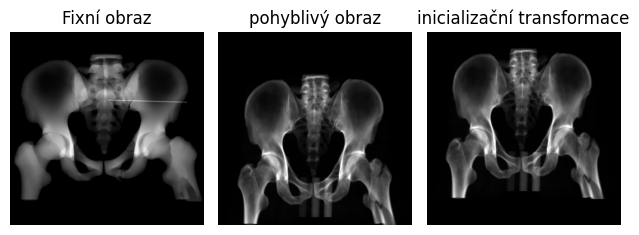

In [40]:
plotImages(fixedImageRescaled, movingImageRescaled, 
           movingInitialImageRescaled, 
           nrows=1, ncols=3)

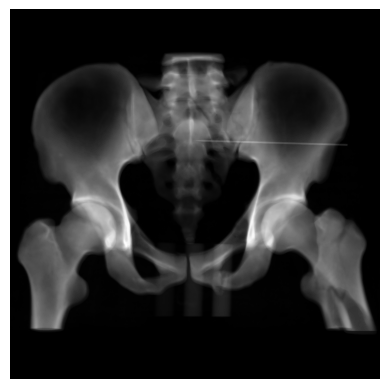

In [41]:
plotAlphaBlend(movingFinalImageRescaled, fixedImageRescaled, alpha=0.5)

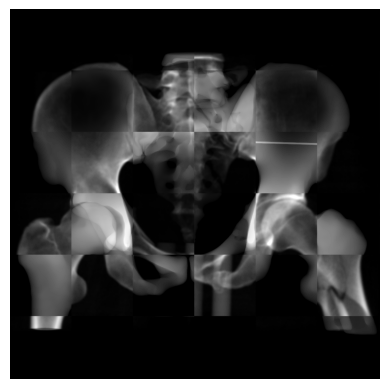

In [42]:
plotCheckerboard(fixedImageRescaled, movingFinalImageRescaled, pattern=(6, 6))

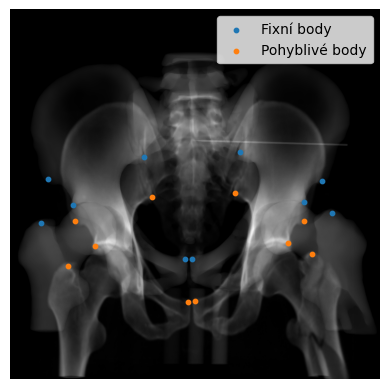

In [43]:
plt.imshow(sitk.GetArrayViewFromImage(fixedImageRescaled), cmap="gray")
plt.imshow(sitk.GetArrayViewFromImage(movingImageRescaled), cmap="gray", alpha=0.5)
plt.scatter(list(pointsInfo["fixedPoints"].T)[0], list(pointsInfo["fixedPoints"].T)[1], 
            c="#1f77b4", s=10, label="Fixní body")
plt.scatter(list(pointsInfo["movingPoints"].T)[0], list(pointsInfo["movingPoints"].T)[1], 
            c="#ff7f0e", s=10, label="Pohyblivé body")
plt.axis("off")
plt.legend()
plt.show()

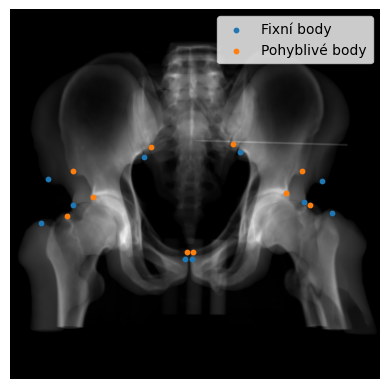

In [44]:
plt.imshow(sitk.GetArrayViewFromImage(fixedImageRescaled), cmap="gray")
plt.imshow(sitk.GetArrayViewFromImage(movingInitialImageRescaled), cmap="gray", alpha=0.5)
plt.scatter(list(pointsInfo["fixedPoints"].T)[0], list(pointsInfo["fixedPoints"].T)[1], 
            c="#1f77b4", s=10, label="Fixní body")
plt.scatter(list(pointsInfo["movingInitialPoints"].T)[0], list(pointsInfo["movingInitialPoints"].T)[1], 
            c="#ff7f0e", s=10, label="Pohyblivé body")
plt.axis("off")
plt.legend()
plt.show()

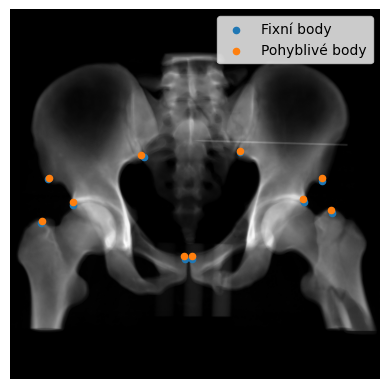

In [45]:
plt.imshow(sitk.GetArrayViewFromImage(fixedImageRescaled), cmap="gray")
plt.imshow(sitk.GetArrayViewFromImage(movingFinalImageRescaled), cmap="gray", alpha=0.5)
plt.scatter(list(pointsInfo["fixedPoints"].T)[0], list(pointsInfo["fixedPoints"].T)[1], 
            c="#1f77b4", s=20, label="Fixní body")
plt.scatter(list(pointsInfo["movingFinalPoints"].T)[0], list(pointsInfo["movingFinalPoints"].T)[1], 
            c="#ff7f0e", s=20, label="Pohyblivé body")
plt.axis("off")
plt.legend()
plt.show()

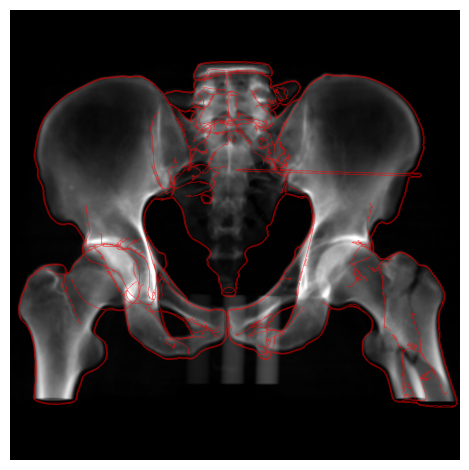

In [69]:
plotImageAndEdge(images["fixedImage"], movingFinalImageRescaled, 
                 lowThresh=0., upThresh=0.8, save=True)